In [7]:
import pandas as pd
import numpy as np
import sklearn.linear_model as sk
import seaborn as sns
import matplotlib.pyplot as plt

Below i tried to do a normal equation to see how it worked. Then I used statsmodel for the homework.

In [65]:
dt = pd.read_excel(r'BloodPressureData.xlsx')
# 250, 5 dimension
original_column_names = dt.columns.tolist()
new_column_names = ['age', 'sex', 'initial_bp', 'drug_dosage', 'systolic_bp_after_treatment']
rename_dict = {original: new for original, new in zip(original_column_names, new_column_names)}
dt = dt.rename(columns=rename_dict)
dt['sex'] = dt['sex'].astype('category')


In [31]:
dt

X = dt[['initial_bp', 'drug_dosage']]
y = dt['systolic_bp_after_treatment']

In [32]:
#using normal equation 

X_m = X.to_numpy()
y_m = y.to_numpy()

In [33]:
ones_column = np.ones((X_m.shape[0], 1))
X_m = np.hstack((ones_column, X_m))


using normal equation

In [34]:
X_t = X_m.transpose()

theta = np.linalg.inv(X_t.dot(X_m)).dot(X_t).dot(y_m)
theta

array([-1.73561778,  1.02320923, -3.05954588])

In [35]:

model  = sk.LinearRegression()
model.fit(X.to_numpy(),y.ravel())
model.intercept_, model.coef_


(-1.7356177841251395, array([ 1.02320923, -3.05954588]))

statsmodel (Assignment)

In [36]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
print(dt.describe())
print(dt.corr())


              age  initial_bp  drug_dosage  systolic_bp_after_treatment
count  250.000000  250.000000   250.000000                   250.000000
mean    75.136000  153.548420     7.545398                   132.291051
std      8.628284   14.545710     1.590894                    16.544549
min     52.000000  130.119750     3.568157                    94.199385
25%     69.000000  140.809782     6.614974                   120.436766
50%     74.500000  152.175504     7.420923                   131.150333
75%     81.000000  166.066600     8.503337                   144.811447
max     97.000000  179.935120    12.839162                   165.138868
                                  age       sex  initial_bp  drug_dosage   
age                          1.000000 -0.081840   -0.040146    -0.005455  \
sex                         -0.081840  1.000000    0.021731     0.010480   
initial_bp                  -0.040146  0.021731    1.000000    -0.107822   
drug_dosage                 -0.005455  0.010480 

In [70]:
X = dt[['initial_bp', 'drug_dosage','age','sex']]
y = dt['systolic_bp_after_treatment']
X = sm.add_constant(X)


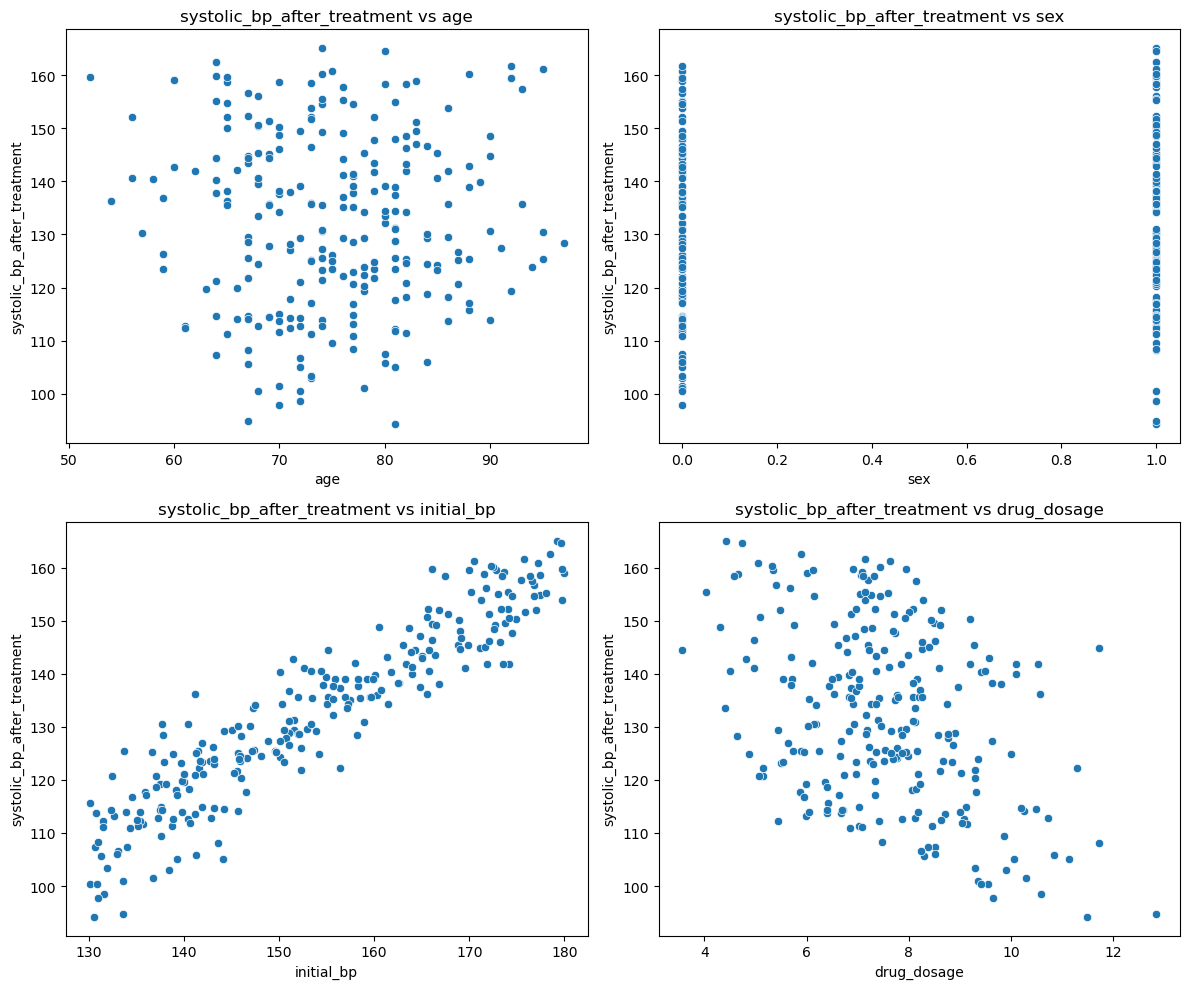

In [44]:
x_cols_order = ['age', 'sex', 'initial_bp', 'drug_dosage']

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Convert the 2x2 axes grid into a 1D list to easily loop through

# Plotting
for i, col in enumerate(x_cols_order):  # Using the ordered list
    sns.scatterplot(data=dt, x=col, y='systolic_bp_after_treatment', ax=axes[i])
    axes[i].set_title(f"systolic_bp_after_treatment vs {col}")

plt.tight_layout()
plt.show()

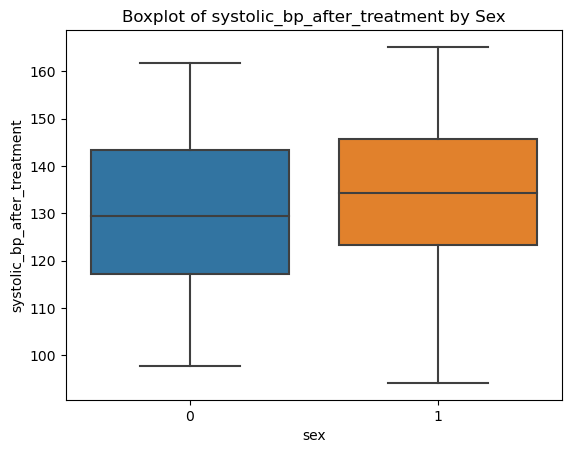

In [76]:
sns.boxplot(x='sex', y='systolic_bp_after_treatment', data=dt)

plt.title('Boxplot of systolic_bp_after_treatment by Sex')
plt.show()

In [71]:
model = sm.OLS(y, X).fit()
rmse = np.sqrt(((y - model.predict(X)) ** 2).mean())

print("RMSE:", rmse)
print(model.summary())

RMSE: 3.2819894286236315
                                 OLS Regression Results                                
Dep. Variable:     systolic_bp_after_treatment   R-squared:                       0.960
Model:                                     OLS   Adj. R-squared:                  0.960
Method:                          Least Squares   F-statistic:                     1489.
Date:                         Tue, 19 Sep 2023   Prob (F-statistic):          1.48e-170
Time:                                 16:43:47   Log-Likelihood:                -651.85
No. Observations:                          250   AIC:                             1314.
Df Residuals:                              245   BIC:                             1331.
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------

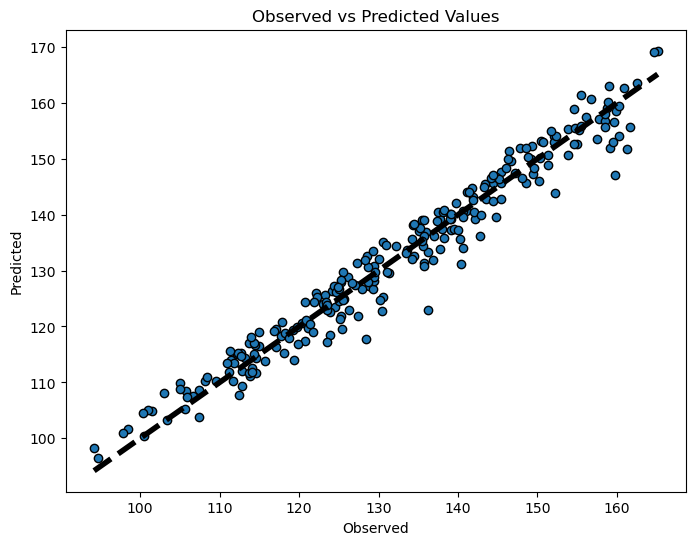

In [72]:

predicted_values = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_values, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted Values')
plt.show()


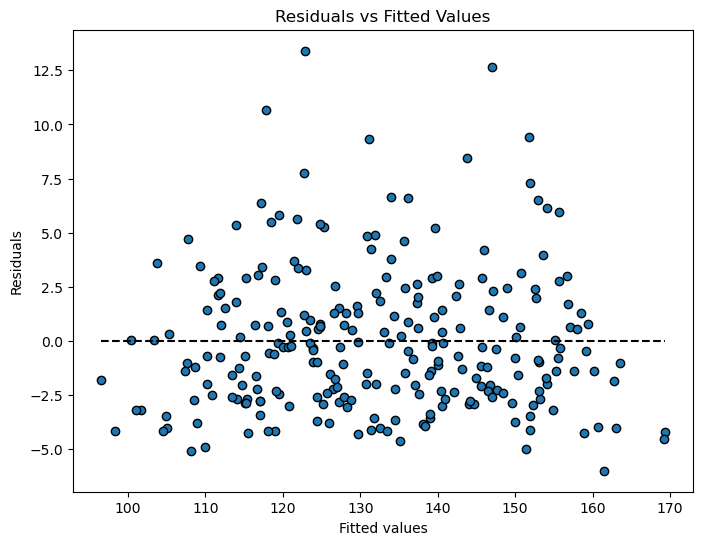

In [73]:
residuals = y - predicted_values

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, edgecolor='k')
plt.hlines(0, predicted_values.min(), predicted_values.max(), colors='k', linestyles='dashed')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


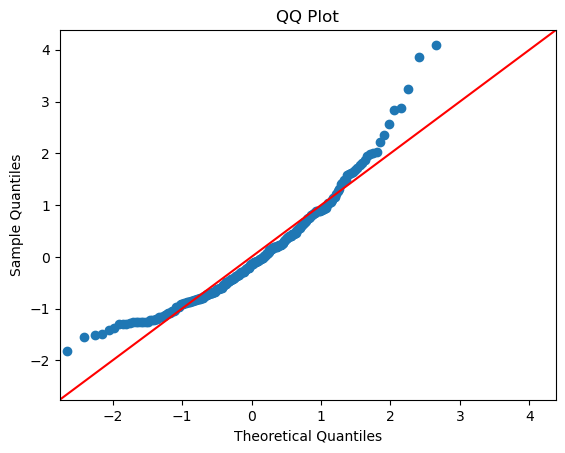

In [74]:
residuals = y - predicted_values
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

In [83]:
# Concatenate to a single dataframe and save results.
X = X.drop('const', axis=1)
df_combined = pd.concat([X, y, pd.Series(model.predict(), name='predicted_values')], axis=1)
df_combined.head()

,initial_bp,drug_dosage,age,sex,systolic_bp_after_treatment,predicted_values
0,171.221889,7.144833,86,0,153.874218,150.752213
1,166.426064,7.984246,79,0,143.468111,142.865320
2,163.676760,7.271092,90,1,148.559803,145.670404
3,146.621486,7.770628,85,1,124.180775,126.408574
4,142.752645,7.233099,81,1,123.560301,123.868637


In [85]:
df_combined.to_excel('data_with_predicted_values.xlsx', index=False, engine='openpyxl')


batch gd

In [ ]:
eta = 0.1 
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) 
for iteration in range(n_iterations):
 gradients = 2/m * X_m.T.dot(X_m.dot(theta) - y)
 theta = theta - eta * gradients